In [88]:
import numpy as np  #for mathematical operation
import pandas as pd  #for data manipulation
import datetime as dlt  #for date-time manipulation

import seaborn as sns  #for data visulization
import matplotlib.pyplot as plt #for data visulization

In [89]:
#RUN pip install lifetimes package on cmd to use the clauses of lifetime 
from lifetimes.plotting import*
from lifetimes.utils import* 


In [90]:
df2=pd.read_excel('Online Retail.xlsx')
df2.shape
#use pip install xlrd on cmd if it's not loading excel file

(541909, 8)

In [91]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [92]:
#let's convert date-time columns 
df2['InvoiceDate']=pd.to_datetime(df2['InvoiceDate']).dt.date

#Removing all the records where customer ID is not given 
df2 = df2[df2['CustomerID'].notna()]

#Removing all customers who have Quantity less than or equal to 0
df2 = df2[df2['Quantity']>0]

#Creating a New Feature Sales to Perform RFM Analysis
df2['Sales'] = df2['Quantity'] * df2['UnitPrice']

#Considering only those columns which are important for the analysis
important_columns = ['CustomerID','InvoiceDate','Sales']
df2 = df2[important_columns]

df2.head()


,CustomerID,InvoiceDate,Sales
0,17850.0,2010-12-01,15.30
1,17850.0,2010-12-01,20.34
2,17850.0,2010-12-01,22.00
3,17850.0,2010-12-01,20.34
4,17850.0,2010-12-01,20.34


In [20]:
#Getting some more insights from the dataset

print('Number of unique customers', df2['CustomerID'].unique())
print('Sales Insights')
print('Average Sales', df2['Sales'].mean())
print('Maximum Sales', df2['Sales'].min())
print('Minimum Sales', df2['Sales'].max())
print('Date Insights')
print('First Date', df2['InvoiceDate'].max())
print('Last Date',df2['InvoiceDate'].min())

Number of unique customers [17850. 13047. 12583. ... 13298. 14569. 12713.]
Sales Insights
Average Sales 22.39474850474768
Maximum Sales 0.0
Minimum Sales 168469.6
Date Insights
First Date 2011-12-09
Last Date 2010-12-01


# CLV Model

* **Frequency** represents the number of repeat purchases the customer has made. This means that it’s one less than the total number of purchases.

* **T** represents the age of the customer in whatever time units chosen (daily, in our dataset). This is equal to the duration between a customer’s first purchase and the end of the period under study.

* **Recency** represents the age of the customer when they made their most recent purchases. This is equal to the duration between a customer’s first purchase and their latest purchase. (Thus if they have made only 1 purchase, the recency is 0.)

In [23]:
# Now lets calculate the Frequency, Recency, and Time using the summary-data-from-transaction function
#here we use summary_data_from... function from lifetime package which we already installed 
#first we will provide our dataframe, then important data columns 
#then value of monetory value and observation end 
#lifetime package is invented by the data scientist of shopify

data = summary_data_from_transaction_data(df2,'CustomerID','InvoiceDate', 
                                          monetary_value_col='Sales', observation_period_end='2011-12-09')
data.head()

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,325.0,0.000000
12347.0,6.0,365.0,367.0,599.701667
12348.0,3.0,283.0,358.0,301.480000
12349.0,0.0,0.0,18.0,0.000000
12350.0,0.0,0.0,310.0,0.000000


In [27]:
print('Insights in Frequency')
print('Average Frequency', data['frequency'].mean())
print('Maximum Frequency', data['frequency'].min())
print('Minimum Frequency', data['frequency'].max())
print('---------------------------------------------')
print('Insights in Recency')
print('Average Recency', data['recency'].mean())
print('Maximum Recency', data['recency'].min())
print('Minimum Recency', data['recency'].max())
print('---------------------------------------------')
print('Insights in Monetary')
print('Average Monetary', data['monetary_value'].mean())
print('Maximum Monetary', data['monetary_value'].min())
print('Minimum Monetary', data['monetary_value'].max())
print('---------------------------------------------')
print('Insights on Duration of Customers(T)')
print('Average Duration of Customers', data['T'].mean())
print('Maximum Duration of Customers', data['T'].min())
print('Minimum Duration of Customers', data['T'].max())



Insights in Frequency
Average Frequency 2.8640239686563724
Maximum Frequency 0.0
Minimum Frequency 131.0
---------------------------------------------
Insights in Recency
Average Recency 130.74141507259736
Maximum Recency 0.0
Minimum Recency 373.0
---------------------------------------------
Insights in Monetary
Average Monetary 306.94416755414903
Maximum Monetary 0.0
Minimum Monetary 168469.6
---------------------------------------------
Insights on Duration of Customers(T)
Average Duration of Customers 222.78289928554966
Maximum Duration of Customers 0.0
Minimum Duration of Customers 373.0


####  Here we see Minimum value of Frequency, Recency, Duration and Monetary is 0

In [49]:
#Lets check the Percentage of Customers who have their Frequency, Recency, T and Monetary value as 0
#This is the logic to find percentage of particular columns in Data  

print('Percentage of Frequency having value 0 : {0:.2f}%'. format(sum((data['frequency']==0)/len(data))))
print('Percentage of Recency having value 0 : {0:.2f}%'. format(sum(data['recency']==0)/float(len(data))))
print('Percentage of Monetary Value having value 0 : {0:0.2f}%'. format(sum(data['monetary_value']==0)/float(len(data))))

Percentage of Frequency having value 0 : 0.36%
Percentage of Recency having value 0 : 0.36%
Percentage of Monetary Value having value 0 : 0.36%


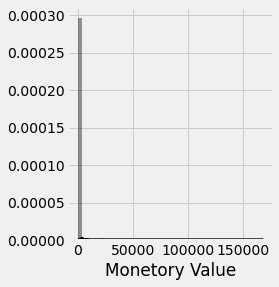

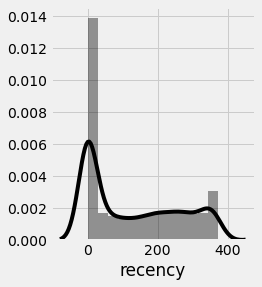

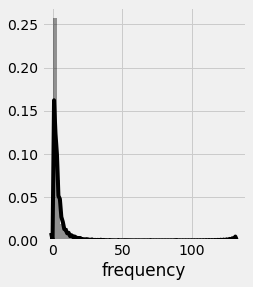

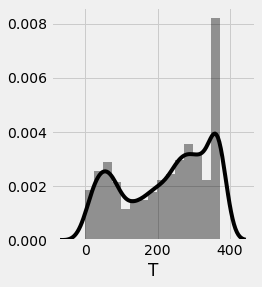

<Figure size 1080x288 with 0 Axes>

In [61]:
# Lets check the Distribution of the Newly Created Features for RFM Analysis

plt.rcParams['figure.figsize'] = (15,4)
plt.style.use('fivethirtyeight')

plt.subplot(1, 4, 1)
sns.distplot(data['monetary_value'], color='black')
plt.xlabel('Monetory Value')
plt.show()

plt.subplot(1, 4, 3)
sns.distplot(data['recency'], color='black')
plt.xlabel('recency')
plt.show()

plt.subplot(1, 4, 4)
sns.distplot(data['frequency'], color='black')
plt.xlabel('frequency')
plt.show()

plt.subplot(1, 4, 3)
sns.distplot(data['T'], color='Black')
plt.xlabel('T')
plt.show()

plt.suptitle('Distribution of Frequency Recency T Monetory value', fontsize=15)
plt.show()

##  **Observations**
* Distribution of Monetary value and frequency is highly skewed 
* Distribution of Monetary value and frequency is lightly skewed

## Frequency and Recency Analysis 

#### Why there is need to Find Frequancy and Recency Analysis ?
* Customer has made a purchase every day for four weeks straight, and then haven’t heard from him in months.
* What are the chances that the customer is still “alive”?
* If a customer who historically made purchase once a quarter, and again last quarter, is likely still alive.

* You can visualize these kinds of relationships using the frequency/recency matrix, which computes the expected number of transactions an artificial customer is going to make in the next time period.
* the recency, which is the age of the customer during his/her last purchase and frequency, which the number of repeat transactions that the customer has made.


*For Frequency and Recency Analysis you have to use the BG-NBD Model also known as Beta-Geometric or Negative Binomial Distribution Model.

*Generally the BG/NBD model is used to predict aggregate future transactions, and you are going to Visualize the Frequency-Recency Matrix.



In [63]:
from lifetimes import BetaGeoFitter

#Making a Beta Geo Fitter Model with penalizer coefiicient as 0.1  
bgf = BetaGeoFitter(penalizer_coef=0.1)

# Feeding the Model with Frequency, Recency, and Duration
bgf.fit(data['frequency'], data['recency'], data['T'])

#let's check the model parameters 
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 4339 subjects, a: 0.00, alpha: 49.41, b: 0.00, r: 0.59>


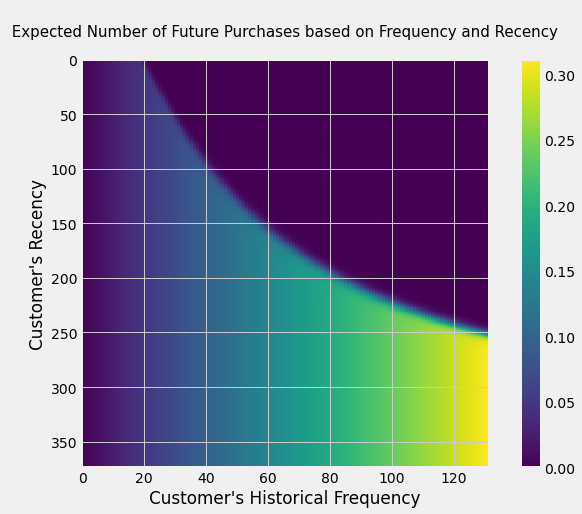

In [65]:
from lifetimes.plotting import plot_frequency_recency_matrix

plt.rcParams['figure.figsize'] = (10, 7)

# Lets plot the Recency vs Frequency Matrix
plot_frequency_recency_matrix(bgf)
plt.title("\n Expected Number of Future Purchases based on Frequency and Recency \n", fontsize = 15)
plt.show()

### **Observations**
* Yellow region depicts Best People which is always small 
* The customer who purchased 120 times within last 250 days is the BEST customer
* Customer who purchased a lot but not recently will be high in number(top right corner of matrix)
* Customers around (40, 100) represents the customer who buys infrequently, and you have not seen him recently, so he might buy again.
* However, it’s not sure if he has gone or just between purchases.

# Estimating Customer's Liveliness

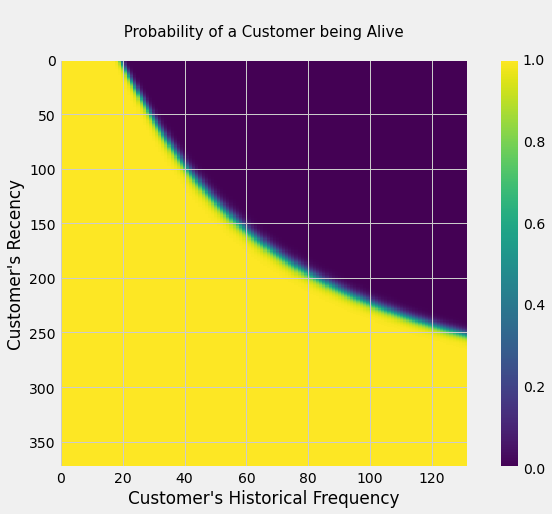

In [66]:
from lifetimes.plotting import plot_probability_alive_matrix

plt.rcParams['figure.figsize'] = (10, 7)

# lets plot the probability of alive Matrix
plot_probability_alive_matrix(bgf)
plt.title("\n Probability of a Customer being Alive \n", fontsize = 15)
plt.show()

#### Observations
* Customers who purchased recently are likely to be Alive in Yellow area
* Customers who purchased a lot but not recently are likely to be dropped out in purple area
* More they bought in the past, more likely they dropped out 
* The BG/NBD model believe that making more purchases within the near future are our best customers.

In [70]:
# Lets Predict the Purchases of the Customers for Future

# we will set the time value as 1 and again use a predefined function from beta geo fitter
# we are using the conditional expected no. of purachases upto time function for doing this
t = 1
data['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t,
                                                                                      data['frequency'],
                                                                                      data['recency'],
                                                                                      data['T'])
# lets check the Tail of the Dataset
data.sort_values(by='predicted_purchases').head(5)

,frequency,recency,T,monetary_value,predicted_purchases
CustomerID,,,,,
18074.0,0.0,0.0,373.0,0.0,0.001405
17968.0,0.0,0.0,373.0,0.0,0.001405
12791.0,0.0,0.0,373.0,0.0,0.001405
13747.0,0.0,0.0,373.0,0.0,0.001405
15922.0,0.0,0.0,373.0,0.0,0.001405


In [71]:
# 'predicted purchase' column predict the number of future purchase by customer based on previous data 
# or
# column 'predicted purchase' predicts a customer expected purchases in the next period using their history 

## Testing the Model
* Testing the Model’s Accuracy is the way you can be sure of the Results produced by the Model.
* Conclusion: – If the Model’s Performance is Good by certain Metrics you can Trust the Output or Predictions made by the Model.

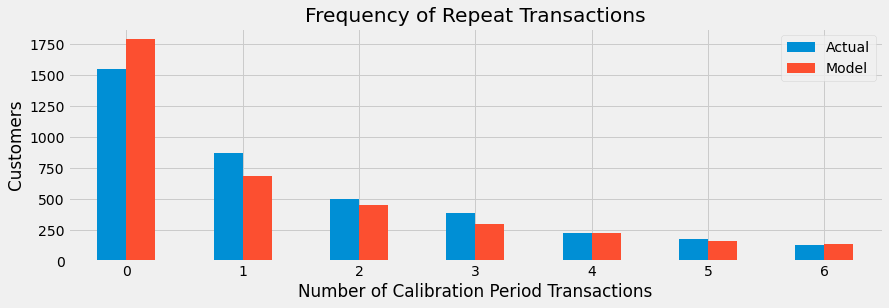

In [78]:
from lifetimes.plotting import plot_period_transactions
#plot
plt.rcParams['figure.figsize']=(13,4)
plot_period_transactions(bgf)
plt.xticks(rotation=360)
plt.show()


* Actual and Predicted value in each of the Period transactions are too close 
* It implies our model is working good

In [80]:
# Now we can partition our dataset into caliber and Holdout to check performance of model on unseen data like cross validation
# We are going to Separate the data into both a in-sample (calibration) and validation (holdout) period. 

from lifetimes.utils import calibration_and_holdout_data

# lets create the calibration and holdout dataset
# sample period i.e calibration period (Trained data) is 2011-06-08
# validation period i.e holdout period (Test data) is 2011-12-9
summary_cal_holdout = calibration_and_holdout_data(df2, 'CustomerID', 'InvoiceDate',
                                        calibration_period_end='2011-06-08',
                                        observation_period_end='2011-12-9' )  

# lets check the head of the calibration and holdout dataset
summary_cal_holdout.head()

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
CustomerID,,,,,
12346.0,0.0,0.0,141.0,0.0,184.0
12347.0,2.0,121.0,183.0,4.0,184.0
12348.0,2.0,110.0,174.0,1.0,184.0
12350.0,0.0,0.0,126.0,0.0,184.0
12352.0,3.0,34.0,112.0,3.0,184.0


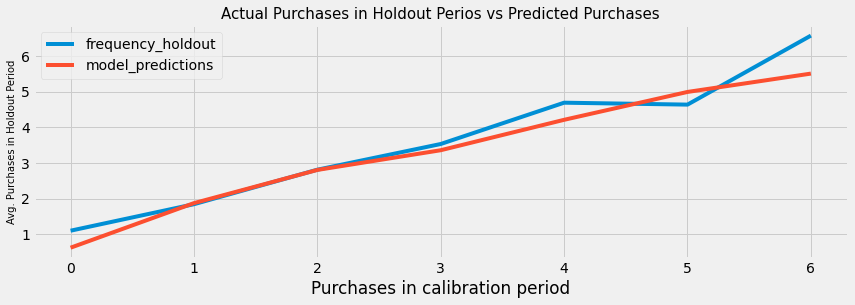

In [81]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

import warnings
warnings.filterwarnings('ignore')

# lets fit the calibration and holdout data
bgf.fit(summary_cal_holdout['frequency_cal'], 
        summary_cal_holdout['recency_cal'],
        summary_cal_holdout['T_cal'])

# lets plot the Actual Purchases in Holdout Period vs Predicted Purches
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)
plt.ylabel('Avg. Purchases in Holdout Period', fontsize = 10)
plt.title('Actual Purchases in Holdout Perios vs Predicted Purchases', fontsize = 15)
plt.show()

* Green and blue line presents the model prediction and actual result of the y-axis respectively.
* calibration period (Trained or old data) spans from begining to 2011-06-08 
* holdout period (Test or unseen data) spans from  2011-06-09 to 2011-12-9 
* plot groups all the customers in the calibration period by their number of repeat purchases on x axis 
* the averages over repeat purchases in Holdout Period on Y axis

In [82]:
# lets do some REal time Predictions

# Lets Do a Prediction for the CustomerID NO. 12347
t = 10
individual = data.loc[12347]
print("Purchase Prediction for Customer ID: 12347: ", bgf.predict(t, individual['frequency'], 
                                                individual['recency'], individual['T']))

# Lets do one more Prediction on Customer ID No. 12346
t = 10
individual = data.loc[12346]
print("Purchase Prediction for Customer ID: 12346: ", bgf.predict(t, individual['frequency'], 
                                                individual['recency'], individual['T']))

Purchase Prediction for Customer ID: 12347:  0.15929394518540368
Purchase Prediction for Customer ID: 12346:  0.013746953061974087


### Total Lifetime of customer 
*To estimate this you are going to use the Gamma-Gamma Model presented by Dr. Peter Fader and Dr. Bruce Hardie from Wharton which is used to predict the Amount spend per transaction at the customer level.

In [84]:
#Predicting the Future Transaction – considering those customers who had at least one repeat purchase.
#which means Filtering the customers with frequency greater than 0.
 
returning_customers_summary = data[data['frequency']>0]

print("\nNumber of Returning Customers who are going to purchase:", len(returning_customers_summary))
print('--------------------------------------')
print(returning_customers_summary.head())



Number of Returning Customers who are going to purchase: 2790
--------------------------------------
            frequency  recency      T  monetary_value  predicted_purchases
CustomerID                                                                
12347.0           6.0    365.0  367.0      599.701667             0.015834
12348.0           3.0    283.0  358.0      301.480000             0.008820
12352.0           6.0    260.0  296.0      368.256667             0.019089
12356.0           2.0    303.0  325.0      269.905000             0.006927
12358.0           1.0    149.0  150.0      683.200000             0.007991


In [85]:
from lifetimes import GammaGammaFitter

#Importing the Gamma-Gamma Model: –
ggf = GammaGammaFitter(penalizer_coef = 0)

# lets fit the Data onto this Model
ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value'])

# lets print the Model Coefficients
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 2790 subjects, p: 2.10, q: 3.45, v: 485.57>


In [86]:
# lets Predict the Future Purchases or Customer Lifetime of Our Customers
# conditional_expected_average_profit is the function of lifetime
x = ggf.conditional_expected_average_profit(
        data['frequency'],
        data['monetary_value'])

# lets print the Head of the Prediction
print("Customer Lifetime Predictions")
x.head()

Customer Lifetime Predictions


CustomerID
12346.0    416.917667
12347.0    569.988807
12348.0    333.762672
12349.0    416.917667
12350.0    416.917667
dtype: float64